# Image Retrieval

When a task requires a model to be able to take as an input more than one type of data, like an image and a sentence, we will call it as **multimodal**. When we think about multimodal models we immediately think about CHatGPT where we can send text, image and audio.<br>
Here we will perform image-to-text matching, image captioning, visual Q&A and zero-shot image classification. For the first three tasks we will be using the Bleep model and for the last task we will be using the Clip model from OpenAI.

In [1]:
!pip install transformers
!pip install torch

/usr/bin/sh: 1: pip: not found
/usr/bin/sh: 1: pip: not found


In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

## Task 1: Image-Text Retrieval 

![image.png](attachment:images/IR1.png)

In [3]:
from transformers import BlipForImageTextRetrieval

In [4]:
model = BlipForImageTextRetrieval.from_pretrained(
"./models/Salesforce/blip-itm-base-coco")

More info about [Salesforce/blip-itm-base-coco](https://huggingface.co/Salesforce/blip-itm-base-coco).

In [5]:
from transformers import AutoProcessor

In [6]:
processor = AutoProcessor.from_pretrained(
    "./models/Salesforce/blip-itm-base-coco")

In [7]:
from PIL import Image

In [8]:
raw_image =  Image.open("man&cat.jpg").convert('RGB')

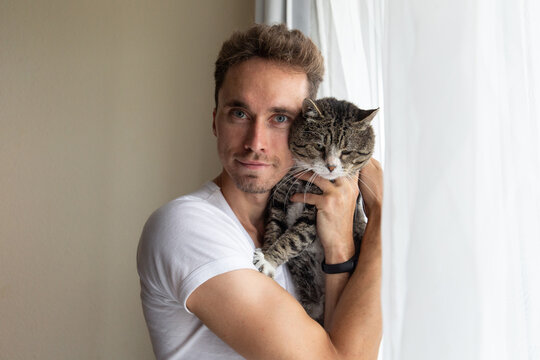

In [9]:
raw_image

Passing the image and text into the processor will modify them in such a way that the model will be able to understand it.

In [10]:
text = "an image of a man holding a cat"

In [11]:
inputs = processor(images=raw_image,
                   text=text,
                   return_tensors="pt")

retrun_tensor is set to pt so that it returns a PyTorch tensor.

In [12]:
inputs

{'pixel_values': tensor([[[[ 2.0772e-01,  1.7853e-01,  1.9312e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          [ 2.0772e-01,  1.7853e-01,  1.9312e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          [ 2.0772e-01,  1.9312e-01,  2.0772e-01,  ...,  1.8135e+00,
            1.8135e+00,  1.8135e+00],
          ...,
          [ 2.9531e-01,  3.2451e-01,  3.2451e-01,  ...,  1.7406e+00,
            1.7552e+00,  1.7844e+00],
          [ 3.2451e-01,  2.9531e-01,  3.0991e-01,  ...,  1.7552e+00,
            1.7552e+00,  1.7844e+00],
          [ 3.2451e-01,  2.8071e-01,  2.9531e-01,  ...,  1.7552e+00,
            1.7698e+00,  1.7990e+00]],

         [[ 1.2387e-01,  1.0887e-01,  1.2387e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
          [ 1.2387e-01,  1.0887e-01,  1.2387e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
          [ 1.2387e-01,  1.2387e-01,  1.3888e-01,  ...,  1.9698e+00,
            1.9698e+00,  1.9698e+00],
   

In [13]:
itm_scores = model(**inputs)[0]

**NOTE:** we have to add a double star before passing inputs as the input is a dictionary that contains the arguements.

In [14]:
itm_scores

tensor([[-1.7542,  1.7517]], grad_fn=<AddmmBackward0>)

These numbers in form of tensor are the logits of the model and to convert these values into something that we can understand, we need to pass them into a softmax layer. The output of this number into the softmax will give us the probability.

In [15]:
import torch

In [16]:
itm_score = torch.nn.functional.softmax(itm_scores,dim=1)

In [17]:
itm_score

tensor([[0.0291, 0.9709]], grad_fn=<SoftmaxBackward0>)

Now we got a tensor with two values, the first value is the probability that the image and the text are not matched which is very low. And the second value is the probability that they are matched.

In [18]:
print(f"""The image and text are matched with a probability of {itm_score[0][1]:.4f}""")

The image and text are matched with a probability of 0.9709


In [19]:
text2 = "an image of a cat holding a man"

In [20]:
inputs2 = processor(images=raw_image,
                   text=text2,
                   return_tensors="pt")

In [21]:
itm_scores2 = model(**inputs2)[0]
itm_score2 = torch.nn.functional.softmax(itm_scores2,dim=1)

In [22]:
print(f"""The image and text are matched with a probability of {itm_score2[0][1]:.4f}""")

The image and text are matched with a probability of 0.9864
